In [44]:
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
df=pd.read_csv(r"C:\Users\mahes\OneDrive\ml\cat and dog\test_data\dogs\spam.csv")

In [20]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
df.shape

(5572, 2)

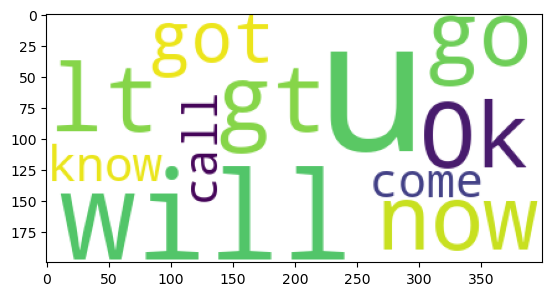

In [37]:
ham_words=" ".join(df[df['Category']=='ham']['Message'].values)
ham_plot=WordCloud(max_words=10,background_color='White').generate(ham_words)
plt.imshow(ham_plot)

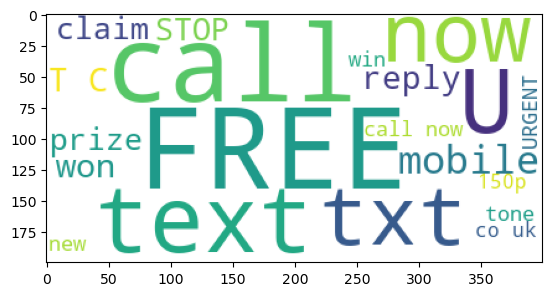

In [40]:
spam_words=" ".join(df[df['Category']=='spam']['Message'].values)
spam_plot=WordCloud(min_font_size=10,max_words=20,background_color='white').generate(spam_words)
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

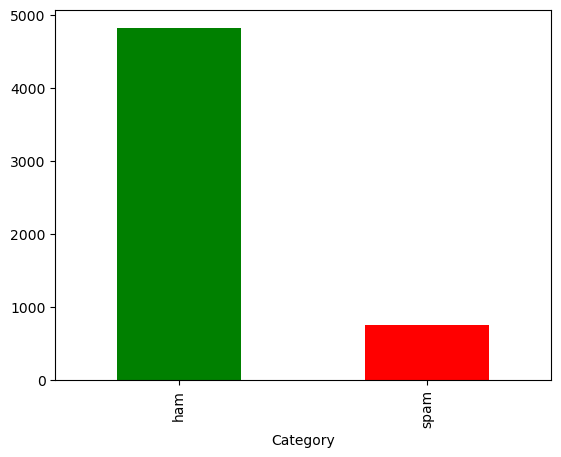

In [43]:
df['Category'].value_counts().plot(kind='bar',color=['green','red'])

In [45]:
x=df.drop('Category',axis=1)

In [46]:
x

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


# Bag of Words

In [47]:
bow=CountVectorizer(stop_words='english')

In [53]:
bow.fit(df['Message'])
X=bow.transform(df['Message']).toarray()
y=df['Category']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

# Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9650224215246637

# svm

In [64]:
from sklearn.svm import SVC
sc= SVC()
sc.fit(x_train,y_train)
y_pred=sc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9775784753363229

# logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

# deployment

In [67]:
email=input("enter the email Id:")
data=bow.transform([email]).toarray()
nb.predict(data)[0]

enter the email Id:wow


'ham'

In [75]:
email=input("enter the email Id:")
data=bow.transform([email]).toarray()
nb.predict(data)[0]

enter the email Id:We have detected unusual activity in your account and require immediate verification to prevent suspension. Please click the link below to verify your information


'spam'

In [69]:
email=input("enter the email Id:")
data=bow.transform([email]).toarray()
nb.predict(data)[0]

enter the email Id:We have detected unusual activity in your account and require immediate verification to prevent suspension. Please click the link below to verify your information


'spam'

# pickle

In [70]:
import pickle
pickle.dump(nb,open("model.pkl","wb")) 

# bow pickle

In [76]:
bow=CountVectorizer(stop_words='english')
bow.fit(df['Message'])
X=bow.transform(df['Message']).toarray()
pickle.dump(bow, open("model2.pkl","wb"))